## Importing Libraries


In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## `Dataset Columns Description`

- Age : Age of the patient

- Sex : Sex of the patient

- exang: exercise induced angina (1 = yes; 0 = no)

- ca: number of major vessels (0-3)

- cp : Chest Pain type chest pain type

- 1) Value 1: typical angina
- 2) Value 2: atypical angina
- 3) Value 3: non-anginal pain
- 4) Value 4: asymptomatic
<br><br>
- trtbps : resting blood pressure (in mm Hg)

- chol : cholestoral in mg/dl fetched via BMI sensor

- fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

- rest_ecg : resting electrocardiographic results

- 1) Value 0: normal
- 2) Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
- 3) Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
<br><br>
- thalach : maximum heart rate achieved

- target : 0= less chance of heart attack 1= more chance of heart attack

## Reading Data


In [21]:
data = pd.read_csv("heart.csv")

## Data Details


In [22]:
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [24]:
data.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Dropping non-useful columns


In [25]:
columns_to_drop = ["trtbps", "fbs", "thalachh", "slp", "caa"]

data.drop(columns_to_drop, axis=1, inplace=True)

## Displaying modified data

In [26]:
data.head()

,age,sex,cp,chol,restecg,exng,oldpeak,thall,output
0,63,1,3,233,0,0,2.3,1,1
1,37,1,2,250,1,0,3.5,2,1
2,41,0,1,204,0,0,1.4,2,1
3,56,1,1,236,1,0,0.8,2,1
4,57,0,0,354,1,1,0.6,2,1


## Checking NaN values

<AxesSubplot: >

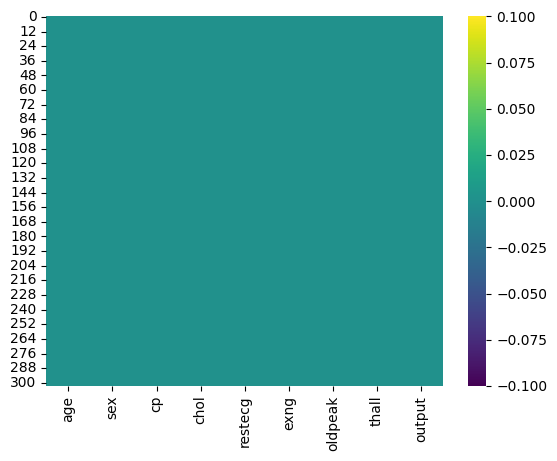

In [27]:
sns.heatmap(data.isnull(), cmap="viridis")

## Deep Learning Model


### Splitting Data


In [28]:
from sklearn.model_selection import train_test_split

X = data.drop("output", axis=1)
y = data["output"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


### Scaling Data


In [29]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [30]:
X_train.shape

(242, 8)

## Structure of Neural Network


In [31]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(
    monitor="val_loss", mode="min", verbose=1, patience=25)

model = Sequential()

model.add(Dense(100, activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(50, activation="relu"))
model.add(Dropout(0.5))

# Binary Classification
model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer="adam", loss="binary_crossentropy")


## Training Model


In [32]:
model.fit(x=X_train, y=y_train,
          validation_data=(X_test, y_test),
          epochs=600,
          callbacks=[early_stop])


Epoch 1/600
8/8 [==============================] - 1s 21ms/step - loss: 0.6966 - val_loss: 0.6807
Epoch 2/600
8/8 [==============================] - 0s 7ms/step - loss: 0.6954 - val_loss: 0.6675
Epoch 3/600
8/8 [==============================] - 0s 7ms/step - loss: 0.6751 - val_loss: 0.6526
Epoch 4/600
8/8 [==============================] - 0s 6ms/step - loss: 0.6540 - val_loss: 0.6374
Epoch 5/600
8/8 [==============================] - 0s 6ms/step - loss: 0.6668 - val_loss: 0.6202
Epoch 6/600
8/8 [==============================] - 0s 7ms/step - loss: 0.6307 - val_loss: 0.6027
Epoch 7/600
8/8 [==============================] - 0s 7ms/step - loss: 0.6211 - val_loss: 0.5848
Epoch 8/600
8/8 [==============================] - 0s 7ms/step - loss: 0.5986 - val_loss: 0.5674
Epoch 9/600
8/8 [==============================] - 0s 6ms/step - loss: 0.6040 - val_loss: 0.5514
Epoch 10/600
8/8 [==============================] - 0s 7ms/step - loss: 0.6033 - val_loss: 0.5387
Epoch 11/600
8/8 [==========

## Plotting Losses


<AxesSubplot: >

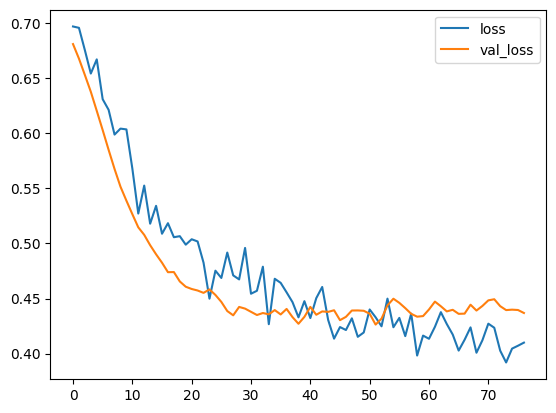

In [33]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [34]:
X_test

array([[ 0.58333333,  1.        ,  0.        ,  0.33487298,  0.        ,
         1.        ,  0.10714286,  0.33333333],
       [ 0.625     ,  1.        ,  1.        ,  0.36258661,  0.        ,
         0.        ,  0.03571429,  1.        ],
       [ 0.58333333,  1.        ,  0.66666667, -0.01154734,  0.5       ,
         0.        ,  0.03571429,  1.        ],
       [ 0.5625    ,  0.        ,  0.        ,  0.64203233,  0.        ,
         1.        ,  0.33928571,  1.        ],
       [ 0.875     ,  0.        ,  0.66666667,  0.30946882,  0.        ,
         0.        ,  0.        ,  0.66666667],
       [ 0.58333333,  1.        ,  0.66666667,  0.08545035,  0.5       ,
         0.        ,  0.28571429,  0.66666667],
       [ 0.35416667,  0.        ,  0.        ,  0.25866051,  0.        ,
         1.        ,  0.        ,  0.66666667],
       [ 0.5625    ,  0.        ,  0.        ,  0.36258661,  0.        ,
         1.        ,  0.71428571,  1.        ],
       [ 0.52083333,  1.        

In [35]:
predictions = (model.predict(X_test) > 0.5)*1

2/2 [==============================] - 0s 0s/step


In [36]:
predictions

array([[0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0]])

In [37]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, predictions))
print()
print(classification_report(y_test, predictions))

[[26  3]
 [ 5 27]]

              precision    recall  f1-score   support

           0       0.84      0.90      0.87        29
           1       0.90      0.84      0.87        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



## Saving the Model

In [38]:
model.save("saved_model/my_model.h5")

## Loading Model

In [39]:
# new_model = tf.keras.models.load_model("saved_model/my_model.h5")